In [6]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [7]:
data = pd.read_csv('data/stud.csv')

In [8]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
#prepare x and y
X = data.drop(columns=['math_score'], axis=1)
y = data['math_score']

In [21]:
print('Categories in gender var: ', end =" ")
print(data['gender'].unique())

print('Categories in race_ethinicity var: ', end =" ")
print(data['race_ethnicity'].unique())

print('Categories in parental level of edu var: ', end =" ")
print(data['parental_level_of_education'].unique())

print('Categories in lunch var: ', end =" ")
print(data['lunch'].unique())

print('Categories in test preparation course var: ', end =" ")
print(data['test_preparation_course'].unique())

print("\n-----------------------\n")
#check for null values
print('Null values in data: ', end =" ")
print(data.isnull().sum().sum())

print("\n-----------------------\n")
#check for duplicates
print('Duplicate values in data: ', end =" ")
print(data.duplicated().sum())

print("\n-----------------------\n")
#check for data types
print('Data types in data: \n', end =" ")
print(data.dtypes)


Categories in gender var:  ['female' 'male']
Categories in race_ethinicity var:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of edu var:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch var:  ['standard' 'free/reduced']
Categories in test preparation course var:  ['none' 'completed']

-----------------------

Null values in data:  0

-----------------------

Duplicate values in data:  0

-----------------------

Data types in data: 
 gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object


In [23]:
#create column transformers for 3 types of transformers
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

numeric_transformer = StandardScaler()
onehot_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('OneHotEncoder', onehot_transformer, cat_features),
        ('StandardScaler', numeric_transformer, num_features)
    ]
)

In [24]:
X = preprocessor.fit_transform(X)
#check the shape of X and y
print('Shape of X: ', end =" ")
print(X.shape)
print('Shape of y: ', end =" ")
print(y.shape)

Shape of X:  (1000, 19)
Shape of y:  (1000,)


In [25]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#check the shape of X_train and y_train
print('Shape of X_train: ', end =" ")
print(X_train.shape)
print('Shape of y_train: ', end =" ")
print(y_train.shape)
print('Shape of X_test: ', end =" ")
print(X_test.shape)
print('Shape of y_test: ', end =" ")
print(y_test.shape)


Shape of X_train:  (800, 19)
Shape of y_train:  (800,)
Shape of X_test:  (200, 19)
Shape of y_test:  (200,)


In [26]:
#evaluation function
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [29]:
models ={
    'KNeighborsRegressor': KNeighborsRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'AdaBoostRegressor': AdaBoostRegressor(),
    'SVR': SVR(),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'CatBoostRegressor': CatBoostRegressor(verbose=0),
    'XGBRegressor': XGBRegressor(eval_metric='logloss')
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    #evaulatetrain and test
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model Performance for training set: ')
    print(' -- Root Mean Squared Error: ', model_train_rmse)
    print(' -- R2 Score: ', model_train_r2)
    print(" -- Mean Absolute Error: ", model_train_mae)
    print("\n-----------------------\n")
    print('Model Performance for test set: ')
    print(' -- Root Mean Squared Error: ', model_test_rmse)
    print(' -- R2 Score: ', model_test_r2)
    print(" -- Mean Absolute Error: ", model_test_mae)
    print("\n-----------------------\n")
    r2_list.append(model_test_r2)
    print("\n-----------------------\n")
    
    print('='*50)
    print('\n')

KNeighborsRegressor
Model Performance for training set: 
 -- Root Mean Squared Error:  5.707884897227694
 -- R2 Score:  0.8554876322327585
 -- Mean Absolute Error:  4.51675

-----------------------

Model Performance for test set: 
 -- Root Mean Squared Error:  7.253040741647602
 -- R2 Score:  0.7838129945787431
 -- Mean Absolute Error:  5.621

-----------------------


-----------------------



DecisionTreeRegressor
Model Performance for training set: 
 -- Root Mean Squared Error:  0.2795084971874737
 -- R2 Score:  0.9996534669718089
 -- Mean Absolute Error:  0.01875

-----------------------

Model Performance for test set: 
 -- Root Mean Squared Error:  7.7149206087943645
 -- R2 Score:  0.755402353266069
 -- Mean Absolute Error:  6.28

-----------------------


-----------------------



RandomForestRegressor
Model Performance for training set: 
 -- Root Mean Squared Error:  2.3174487067953433
 -- R2 Score:  0.9761781840844468
 -- Mean Absolute Error:  1.8361635416666666

----------

In [30]:
#result 
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model', 'R2 Score']).sort_values(by='R2 Score', ascending=False).reset_index(drop=True)

,Model,R2 Score
0,Ridge,0.880593
1,LinearRegression,0.880433
2,CatBoostRegressor,0.851632
3,RandomForestRegressor,0.850319
4,AdaBoostRegressor,0.848464
5,XGBRegressor,0.827797
6,Lasso,0.825320
7,KNeighborsRegressor,0.783813
8,DecisionTreeRegressor,0.755402
9,SVR,0.728600


In [32]:
#lets use Linear Regression 
linear_model = LinearRegression(fit_intercept=True)
linear_model = linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print('Accuracy Score of Model is %.2f '%score)

Accuracy Score of Model is 88.04 


Text(0, 0.5, 'Predictions')

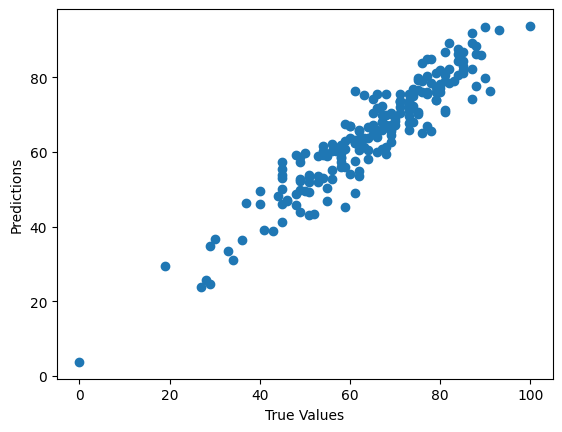

In [33]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')

<Axes: xlabel='math_score'>

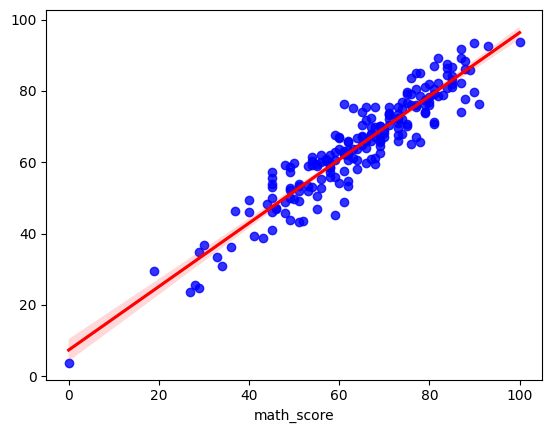

In [34]:
sns.regplot(x=y_test, y=y_pred, line_kws={"color": "red"}, scatter_kws={"color": "blue"})

In [38]:
pred_df = pd.DataFrame({'True Values': y_test, 'Predictions': y_pred, 'Difference': y_test - y_pred})

In [39]:
pred_df.head()

,True Values,Predictions,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
